### Importación de datos



In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.0f}'.format

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url); tienda['Tienda'] = 'Tienda 1'
tienda2 = pd.read_csv(url2); tienda2['Tienda'] = 'Tienda 2'
tienda3 = pd.read_csv(url3); tienda3['Tienda'] = 'Tienda 3'
tienda4 = pd.read_csv(url4); tienda4['Tienda'] = 'Tienda 4'

df_concat = pd.concat(([tienda, tienda2, tienda3, tienda4]), ignore_index=True)

tiendas = {
    'tienda': tienda,
    'tienda2': tienda2,
    'tienda3': tienda3,
    'tienda4': tienda4
}


tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,"164,300","6,900",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,5,-74,Tienda 1
1,Mesa de comedor,Muebles,"192,300","8,400",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6,-76,Tienda 1
2,Juego de mesa,Juguetes,"209,600","15,900",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10,-76,Tienda 1
3,Microondas,Electrodomésticos,"757,500","41,000",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3,-77,Tienda 1
4,Silla de oficina,Muebles,"335,200","20,200",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6,-76,Tienda 1


#1. Análisis de facturación



In [29]:
ingresos = {nombre: df['Precio'].sum() for nombre, df in tiendas.items()}
ingresos_df = pd.DataFrame(list(ingresos.items()), columns=['Tienda', 'Ingresos'])
ingresos_df

,Tienda,Ingresos
0,tienda,"1,150,880,400"
1,tienda2,"1,116,343,500"
2,tienda3,"1,098,019,600"
3,tienda4,"1,038,375,700"


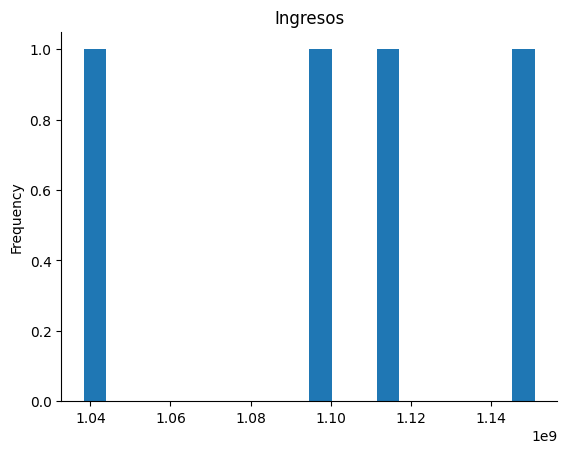

In [28]:
from matplotlib import pyplot as plt
ingresos_df['Ingresos'].plot(kind='hist', bins=20, title='Ingresos')
plt.gca().spines[['top', 'right',]].set_visible(False)

# 2. Ventas por categoría

In [34]:
ventas_categoria = pd.DataFrame({
    nombre: df['Categoría del Producto'].value_counts() for nombre, df in tiendas.items()
}).fillna(0).astype(int)

ventas_categoria

,tienda,tienda2,tienda3,tienda4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


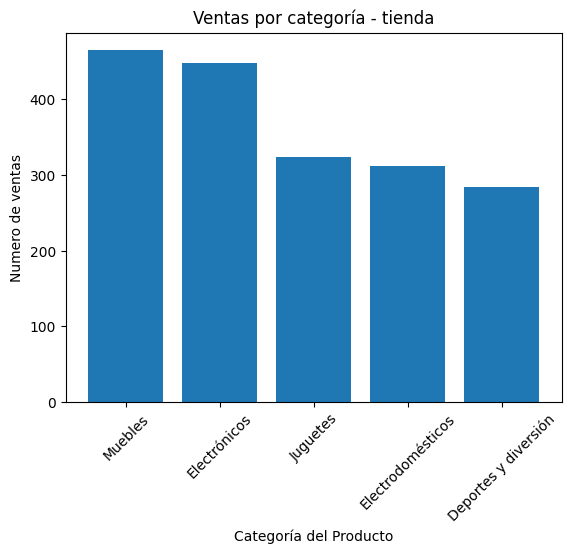

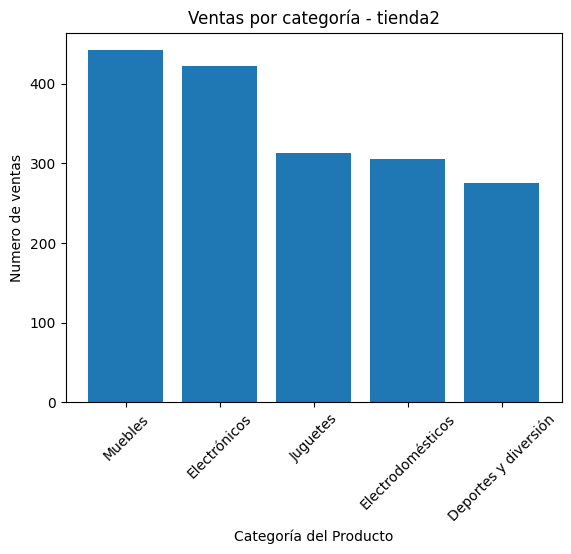

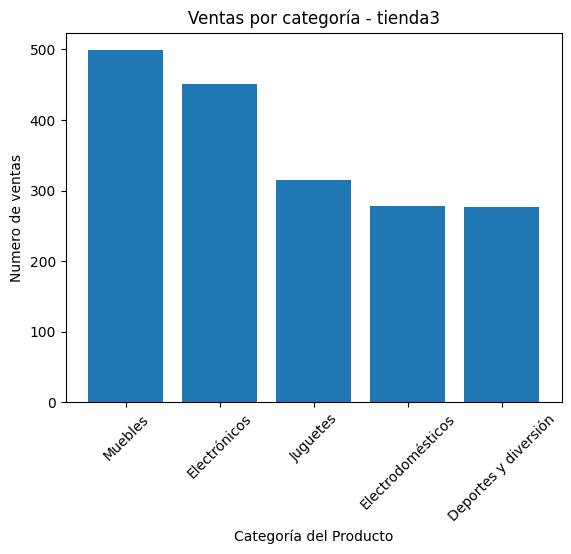

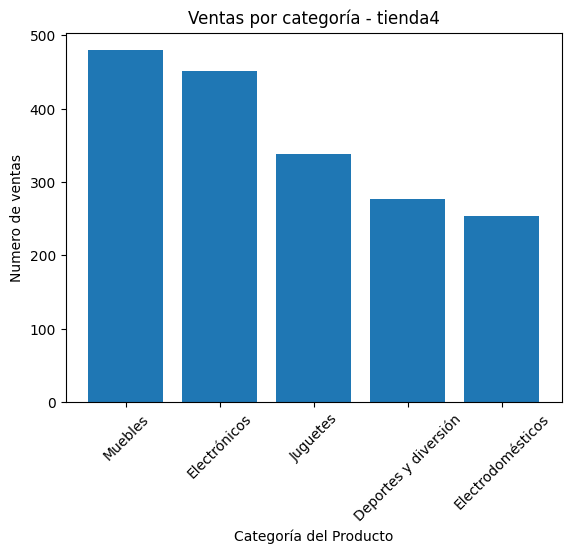

In [35]:
for nombre, df in tiendas.items():
    counts = df['Categoría del Producto'].value_counts().head(5)
    plt.figure()
    plt.bar(counts.index, counts.values)
    plt.title(f'Ventas por categoría - {nombre}')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Numero de ventas')
    plt.xticks(rotation=45)
    plt.show()

# 3. Calificación promedio de la tienda


In [41]:
calificaciones = {nombre: df['Calificación'].mean() for nombre, df in tiendas.items()}
calificaciones_df = pd.DataFrame(list(calificaciones.items()), columns=['Tienda', 'Calificación media'])
calificaciones_df

,Tienda,Calificación media
0,tienda,4
1,tienda2,4
2,tienda3,4
3,tienda4,4


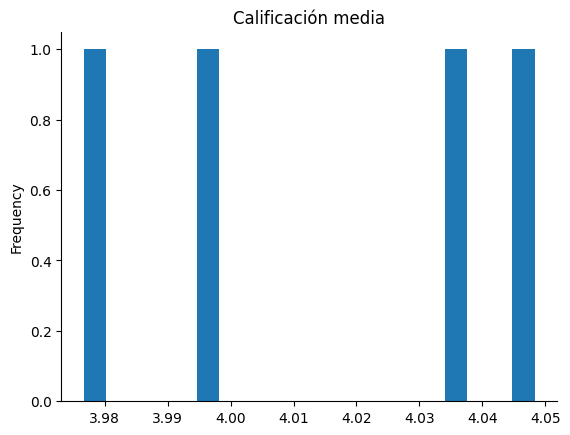

In [42]:
from matplotlib import pyplot as plt
calificaciones_df['Calificación media'].plot(kind='hist', bins=20, title='Calificación media')
plt.gca().spines[['top', 'right',]].set_visible(False)

# 4. Productos más y menos vendidos

In [39]:
for nombre, df in tiendas.items():
    counts = df['Producto'].value_counts()
    top5 = counts.head(5)
    bottom5 = counts.tail(5)

    print(f"\n=== {nombre} ===")
    display(pd.concat([top5, bottom5], axis=1, keys=['Top 5', 'Peores 5']))



=== tienda ===


,Top 5,Peores 5
Producto,,
Microondas,60,NaN
TV LED UHD 4K,60,NaN
Armario,60,NaN
Secadora de ropa,58,NaN
Mesa de noche,56,NaN
Ciencia de datos con Python,NaN,39
Pandereta,NaN,36
Olla de presión,NaN,35
Auriculares con micrófono,NaN,33



=== tienda2 ===


,Top 5,Peores 5
Producto,,
Iniciando en programación,65,NaN
Microondas,62,NaN
Batería,61,NaN
Guitarra acústica,58,NaN
Pandereta,58,NaN
Auriculares,NaN,37
Sillón,NaN,35
Mesa de comedor,NaN,34
Impresora,NaN,34



=== tienda3 ===


,Top 5,Peores 5
Producto,,
Kit de bancas,57,NaN
Mesa de comedor,56,NaN
Cama king,56,NaN
Set de ollas,55,NaN
Mesa de noche,55,NaN
Guitarra eléctrica,NaN,38
Set de vasos,NaN,36
Mochila,NaN,36
Microondas,NaN,36



=== tienda4 ===


,Top 5,Peores 5
Producto,,
Cama box,62,NaN
Cubertería,59,NaN
Dashboards con Power BI,56,NaN
Cama king,56,NaN
Carrito de control remoto,55,NaN
Refrigerador,NaN,38
Ciencia de datos con Python,NaN,38
Guitarra acústica,NaN,37
Armario,NaN,34


<function matplotlib.pyplot.show(close=None, block=None)>

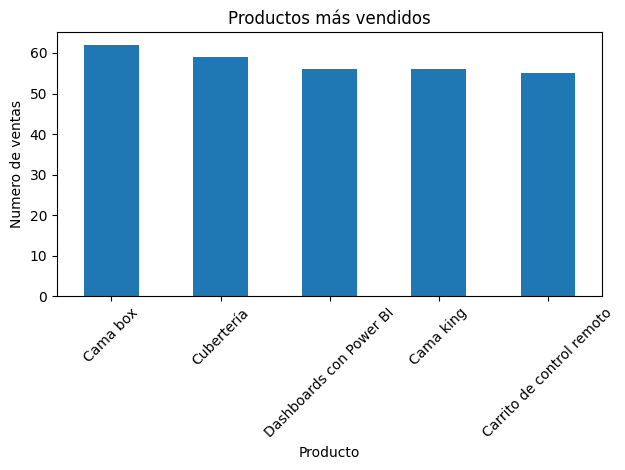

In [46]:
plt.figure()
top5.plot(kind='bar', title='Productos más vendidos')
plt.ylabel('Numero de ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

# 5. Envío promedio por tienda

In [43]:
envio_promedio = {nombre: df['Costo de envío'].mean() for nombre, df in tiendas.items()}
envio_df = pd.DataFrame(list(envio_promedio.items()), columns=['Tienda', 'Envío promedio'])
envio_df

,Tienda,Envío promedio
0,tienda,"26,019"
1,tienda2,"25,216"
2,tienda3,"24,806"
3,tienda4,"23,459"


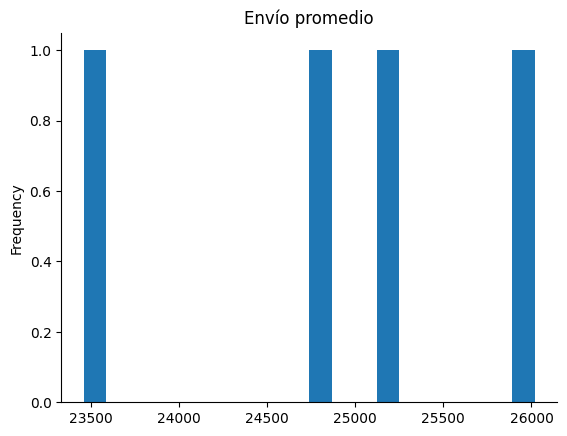

In [44]:
from matplotlib import pyplot as plt
envio_df['Envío promedio'].plot(kind='hist', bins=20, title='Envío promedio')
plt.gca().spines[['top', 'right',]].set_visible(False)